# 楕円フーリエ解析

In [ ]:
!pip install ktch

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from ktch.datasets import load_outline_mosquito_wings
from ktch.harmonic import EllipticFourierAnalysis
from ktch.plot import plot_explained_variance_ratio

## mosquito wing 輪郭データの読み込み
from Rohlf and Archie 1984 _Syst. Zool._

In [2]:
data_outline_mosquito_wings = load_outline_mosquito_wings(as_frame=True)
data_outline_mosquito_wings.coords

x        y
specimen_id coord_id                  
1           0         0.99973  0.00000
            1         0.81881  0.05151
            2         0.70063  0.08851
            3         0.61179  0.11670
            4         0.53226  0.13666
...                       ...      ...
126         95        0.68167 -0.22149
            96        0.76135 -0.19548
            97        0.90752 -0.17312
            98        0.95720 -0.12093
            99        0.95964 -0.06038

[12600 rows x 2 columns]

In [3]:
coords = data_outline_mosquito_wings.coords.to_numpy().reshape(-1, 100, 2)

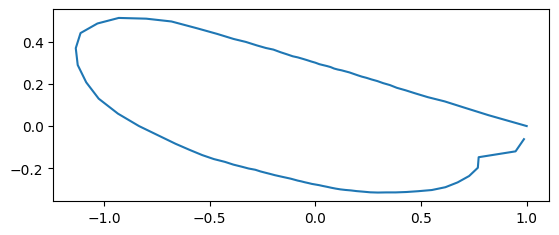

In [4]:
fig, ax = plt.subplots()
sns.lineplot(x=coords[0][:, 0], y=coords[0][:, 1], sort=False, estimator=None, ax=ax)
ax.set_aspect("equal")

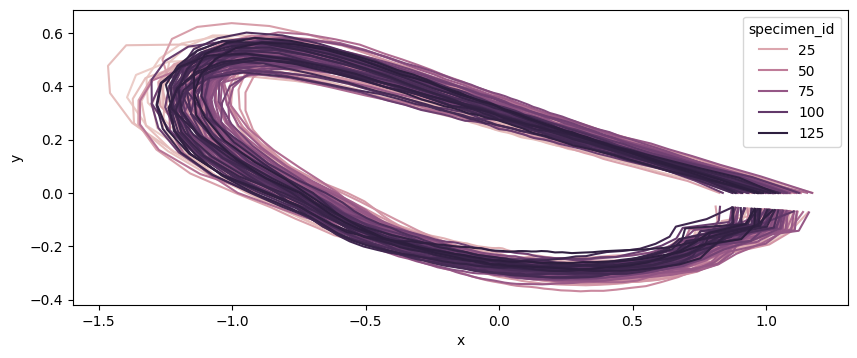

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(
    data=data_outline_mosquito_wings.coords,
    x="x",
    y="y",
    hue="specimen_id",
    sort=False,
    estimator=None,
    ax=ax,
)
ax.set_aspect("equal")

## EFA

In [6]:
efa = EllipticFourierAnalysis(n_harmonics=20)

In [7]:
coef = efa.fit_transform(coords)

In [8]:
coef

array([[-1.94774822e-01,  1.00000000e+00, -6.56094220e-03, ...,
         4.82894920e-04,  7.49284890e-04,  1.96570975e-04],
       [-2.30290331e-01,  1.00000000e+00, -2.03160690e-03, ...,
        -1.45387630e-04,  1.30918463e-04,  1.35158620e-04],
       [-3.94577821e-01,  1.00000000e+00, -2.72153389e-03, ...,
         4.77218021e-04,  9.19661798e-04,  5.91504706e-04],
       ...,
       [-3.13208557e-01,  1.00000000e+00,  3.78985896e-03, ...,
         5.99152085e-04,  7.60443280e-04,  5.36543481e-04],
       [-2.55364221e-01,  1.00000000e+00, -1.23735595e-03, ...,
         7.28118977e-04,  3.27578210e-04,  2.43035302e-04],
       [-2.31230731e-01,  1.00000000e+00,  3.13797087e-03, ...,
         9.51297560e-04,  4.42678575e-04,  4.04630047e-04]],
      shape=(126, 84))

## PCA

In [9]:
pca = PCA(n_components=10)
pcscores = pca.fit_transform(coef)

In [10]:
df_pca = pd.DataFrame(pcscores)
df_pca["specimen_id"] = [i for i in range(1, len(pcscores) + 1)]
df_pca = df_pca.set_index("specimen_id")
df_pca = df_pca.join(data_outline_mosquito_wings.meta)
df_pca = df_pca.rename(columns={i: ("PC" + str(i + 1)) for i in range(12)})
df_pca

PC1       PC2       PC3       PC4       PC5       PC6  \
specimen_id                                                               
1            0.004277 -0.019211  0.018697  0.000810 -0.001363 -0.015705   
2           -0.034207  0.019829  0.000914  0.002444  0.004912  0.004622   
3           -0.199464 -0.031161 -0.045073  0.008504 -0.004950  0.006258   
4           -0.248697  0.035792 -0.019214 -0.000370  0.007445 -0.009597   
5            0.151898 -0.057919 -0.009257  0.009022  0.002941  0.009306   
...               ...       ...       ...       ...       ...       ...   
122         -0.084827  0.032089 -0.023891  0.000607  0.007980 -0.003300   
123         -0.096891 -0.043715  0.000709 -0.007439 -0.005802 -0.003579   
124         -0.119387  0.016518 -0.031522 -0.021842  0.001695  0.002130   
125         -0.059915  0.046869  0.014093 -0.002840  0.008363 -0.001264   
126         -0.035477  0.031945  0.008483 -0.019398 -0.002612  0.005169   

                  PC7       PC8       PC9      PC10 genus  
specimen_id                                                
1            0.007489 -0.000853 -0.004332  0.000064    AN  
2            0.002922 -0.000719 -0.008601 -0.003872    AN  
3            0.001273  0.004424 -0.003027 -0.000986    AN  
4            0.004925  0.001945  0.001729 -0.001801    AN  
5            0.003443 -0.001652 -0.001026 -0.004647    AN  
...               ...       ...       ...       ...   ...  
122          0.000688  0.002950  0.003434 -0.001497    CX  
123          0.005781  0.000594  0.006692  0.001221    CX  
124          0.002902  0.003965  0.000240 -0.001915    CX  
125          0.001011  0.000412  0.003208  0.004421    CX  
126          0.004838 -0.000205  0.002391 -0.002302    DE  

[126 rows x 11 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

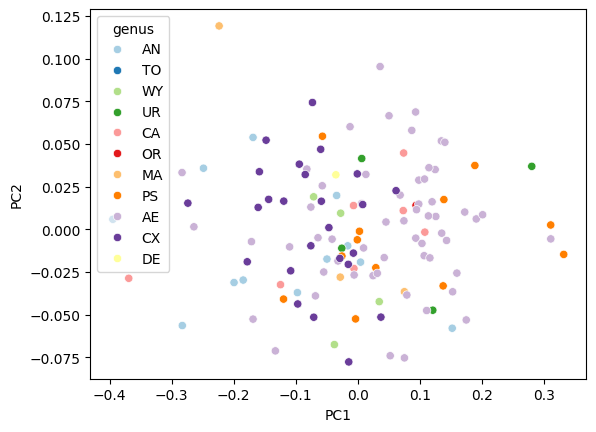

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="genus", ax=ax, palette="Paired")

## 形態空間

In [12]:
def get_pc_scores_for_morphospace(ax, num=5):
    xrange = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num)
    yrange = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], num)
    return xrange, yrange


def plot_recon_morphs(
    pca,
    efa,
    fig,
    ax,
    n_PCs_xy=[1, 2],
    morph_num=3,
    morph_scale=1.0,
    morph_color="lightgray",
    morph_alpha=0.7,
):
    pc_scores_h, pc_scores_v = get_pc_scores_for_morphospace(ax, morph_num)
    print("PC_h: ", pc_scores_h, ", PC_v: ", pc_scores_v)
    for pc_score_h in pc_scores_h:
        for pc_score_v in pc_scores_v:
            pc_score = np.zeros(pca.n_components_)
            n_PC_h, n_PC_v = n_PCs_xy
            pc_score[n_PC_h - 1] = pc_score_h
            pc_score[n_PC_v - 1] = pc_score_v

            arr_coef = pca.inverse_transform([pc_score])

            ax_width = ax.get_window_extent().width
            fig_width = fig.get_window_extent().width
            fig_height = fig.get_window_extent().height
            morph_size = morph_scale * ax_width / (fig_width * morph_num)
            loc = ax.transData.transform((pc_score_h, pc_score_v))
            axins = fig.add_axes(
                [
                    loc[0] / fig_width - morph_size / 2,
                    loc[1] / fig_height - morph_size / 2,
                    morph_size,
                    morph_size,
                ],
                anchor="C",
            )

            coords = efa.inverse_transform(arr_coef)
            x = coords[0][:, 0]
            y = coords[0][:, 1]

            axins.plot(
                x.astype(float), y.astype(float), color=morph_color, alpha=morph_alpha
            )
            axins.axis("equal")
            axins.axis("off")

PC_h:  [-0.43098724 -0.23129168 -0.03159612  0.16809944  0.367795  ] , PC_v:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555]


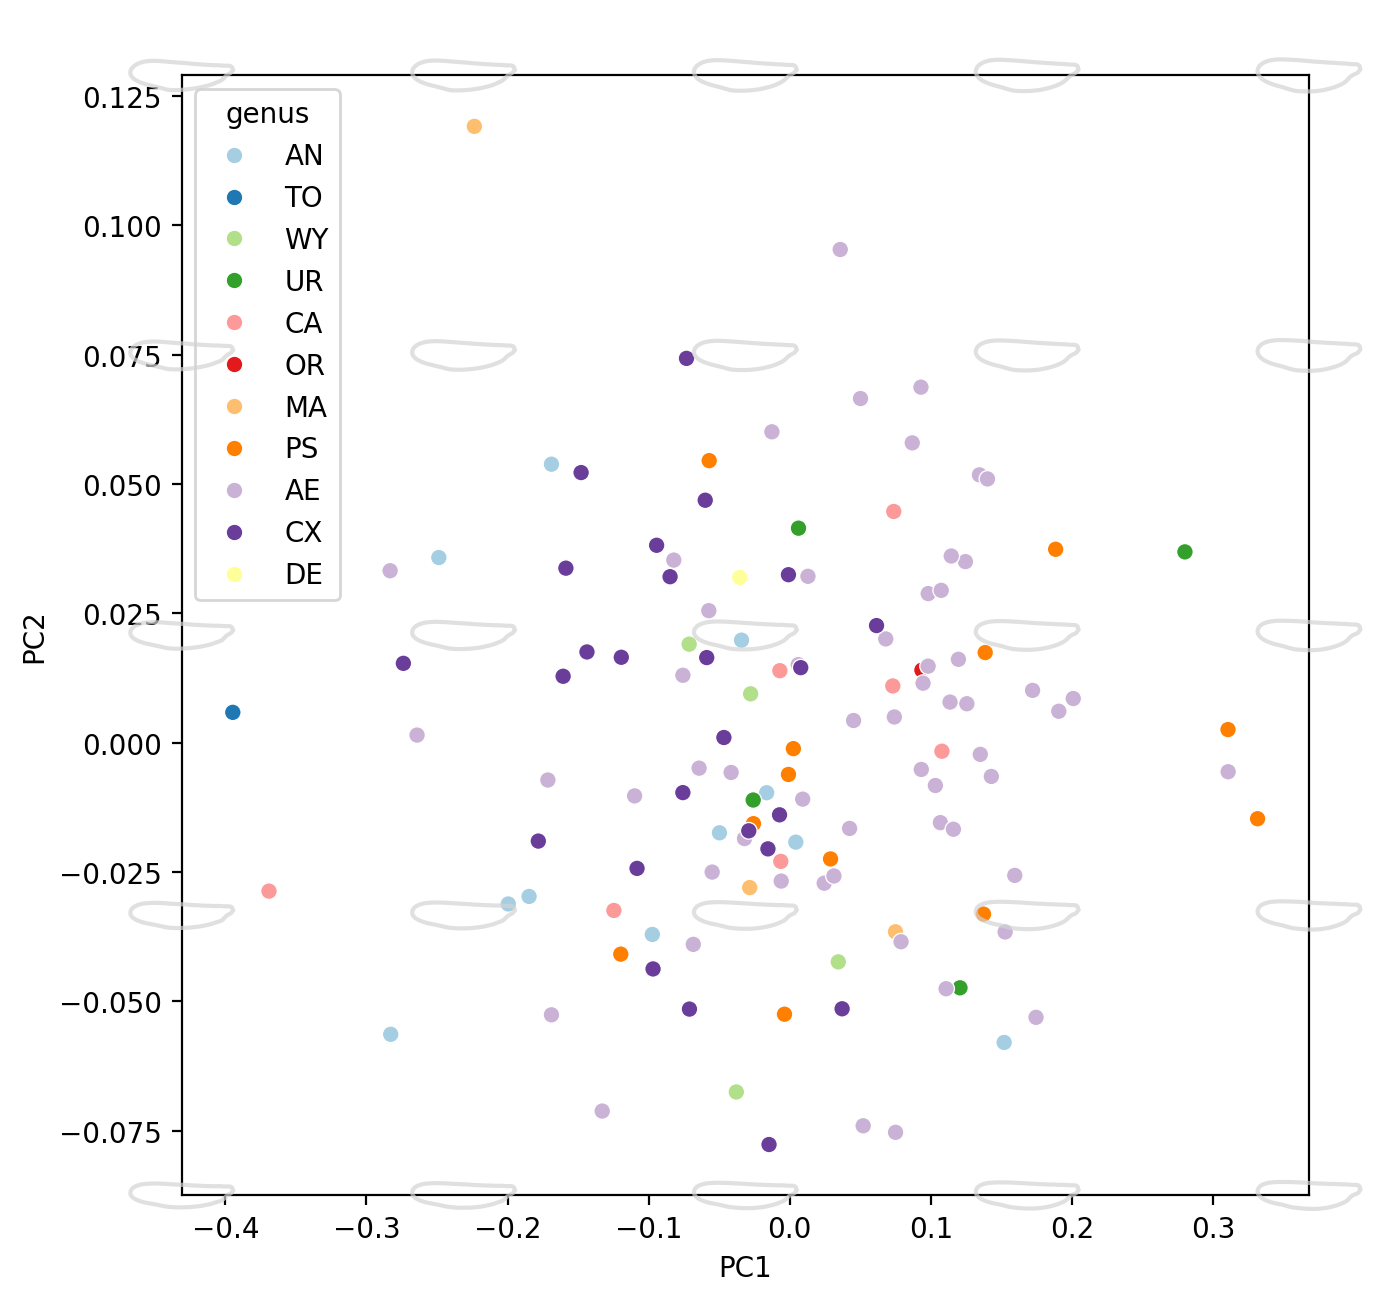

In [24]:
fig = plt.figure(figsize=(16, 16), dpi=200)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="genus",
    hue_order=None,
    palette="Paired",
    ax=ax,
    legend=True,
)

plot_recon_morphs(pca, efa, morph_num=5, morph_scale=0.5, fig=fig, ax=ax)

PC_h:  [-0.43098724 -0.23129168 -0.03159612  0.16809944  0.367795  ] , PC_v:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555]
PC1-PC2 done
PC_h:  [-0.08749144 -0.0333772   0.02073705  0.0748513   0.12896555] , PC_v:  [-0.06424967 -0.0314274   0.00139486  0.03421713  0.0670394 ]
PC2-PC3 done
PC_h:  [-0.06424967 -0.0314274   0.00139486  0.03421713  0.0670394 ] , PC_v:  [-0.43098724 -0.23129168 -0.03159612  0.16809944  0.367795  ]
PC3-PC1 done
Explained variance ratio:
['PC1 0.8973793082876145', 'PC2 0.06795826373299053', 'PC3 0.023626937292117317', 'PC4 0.003773503228718847', 'PC5 0.0029283024499909232', 'PC6 0.0012560615081739727', 'PC7 0.0007323203596517944', 'PC8 0.0005507118631158467', 'PC9 0.000435657103374727', 'PC10 0.00030767134202518126']
Cumsum of Explained variance ratio:
['PC1 0.8973793082876145', 'PC2 0.965337572020605', 'PC3 0.9889645093127223', 'PC4 0.9927380125414411', 'PC5 0.995666314991432', 'PC6 0.9969223764996059', 'PC7 0.9976546968592577', 'PC8 0.998205

<Axes: >

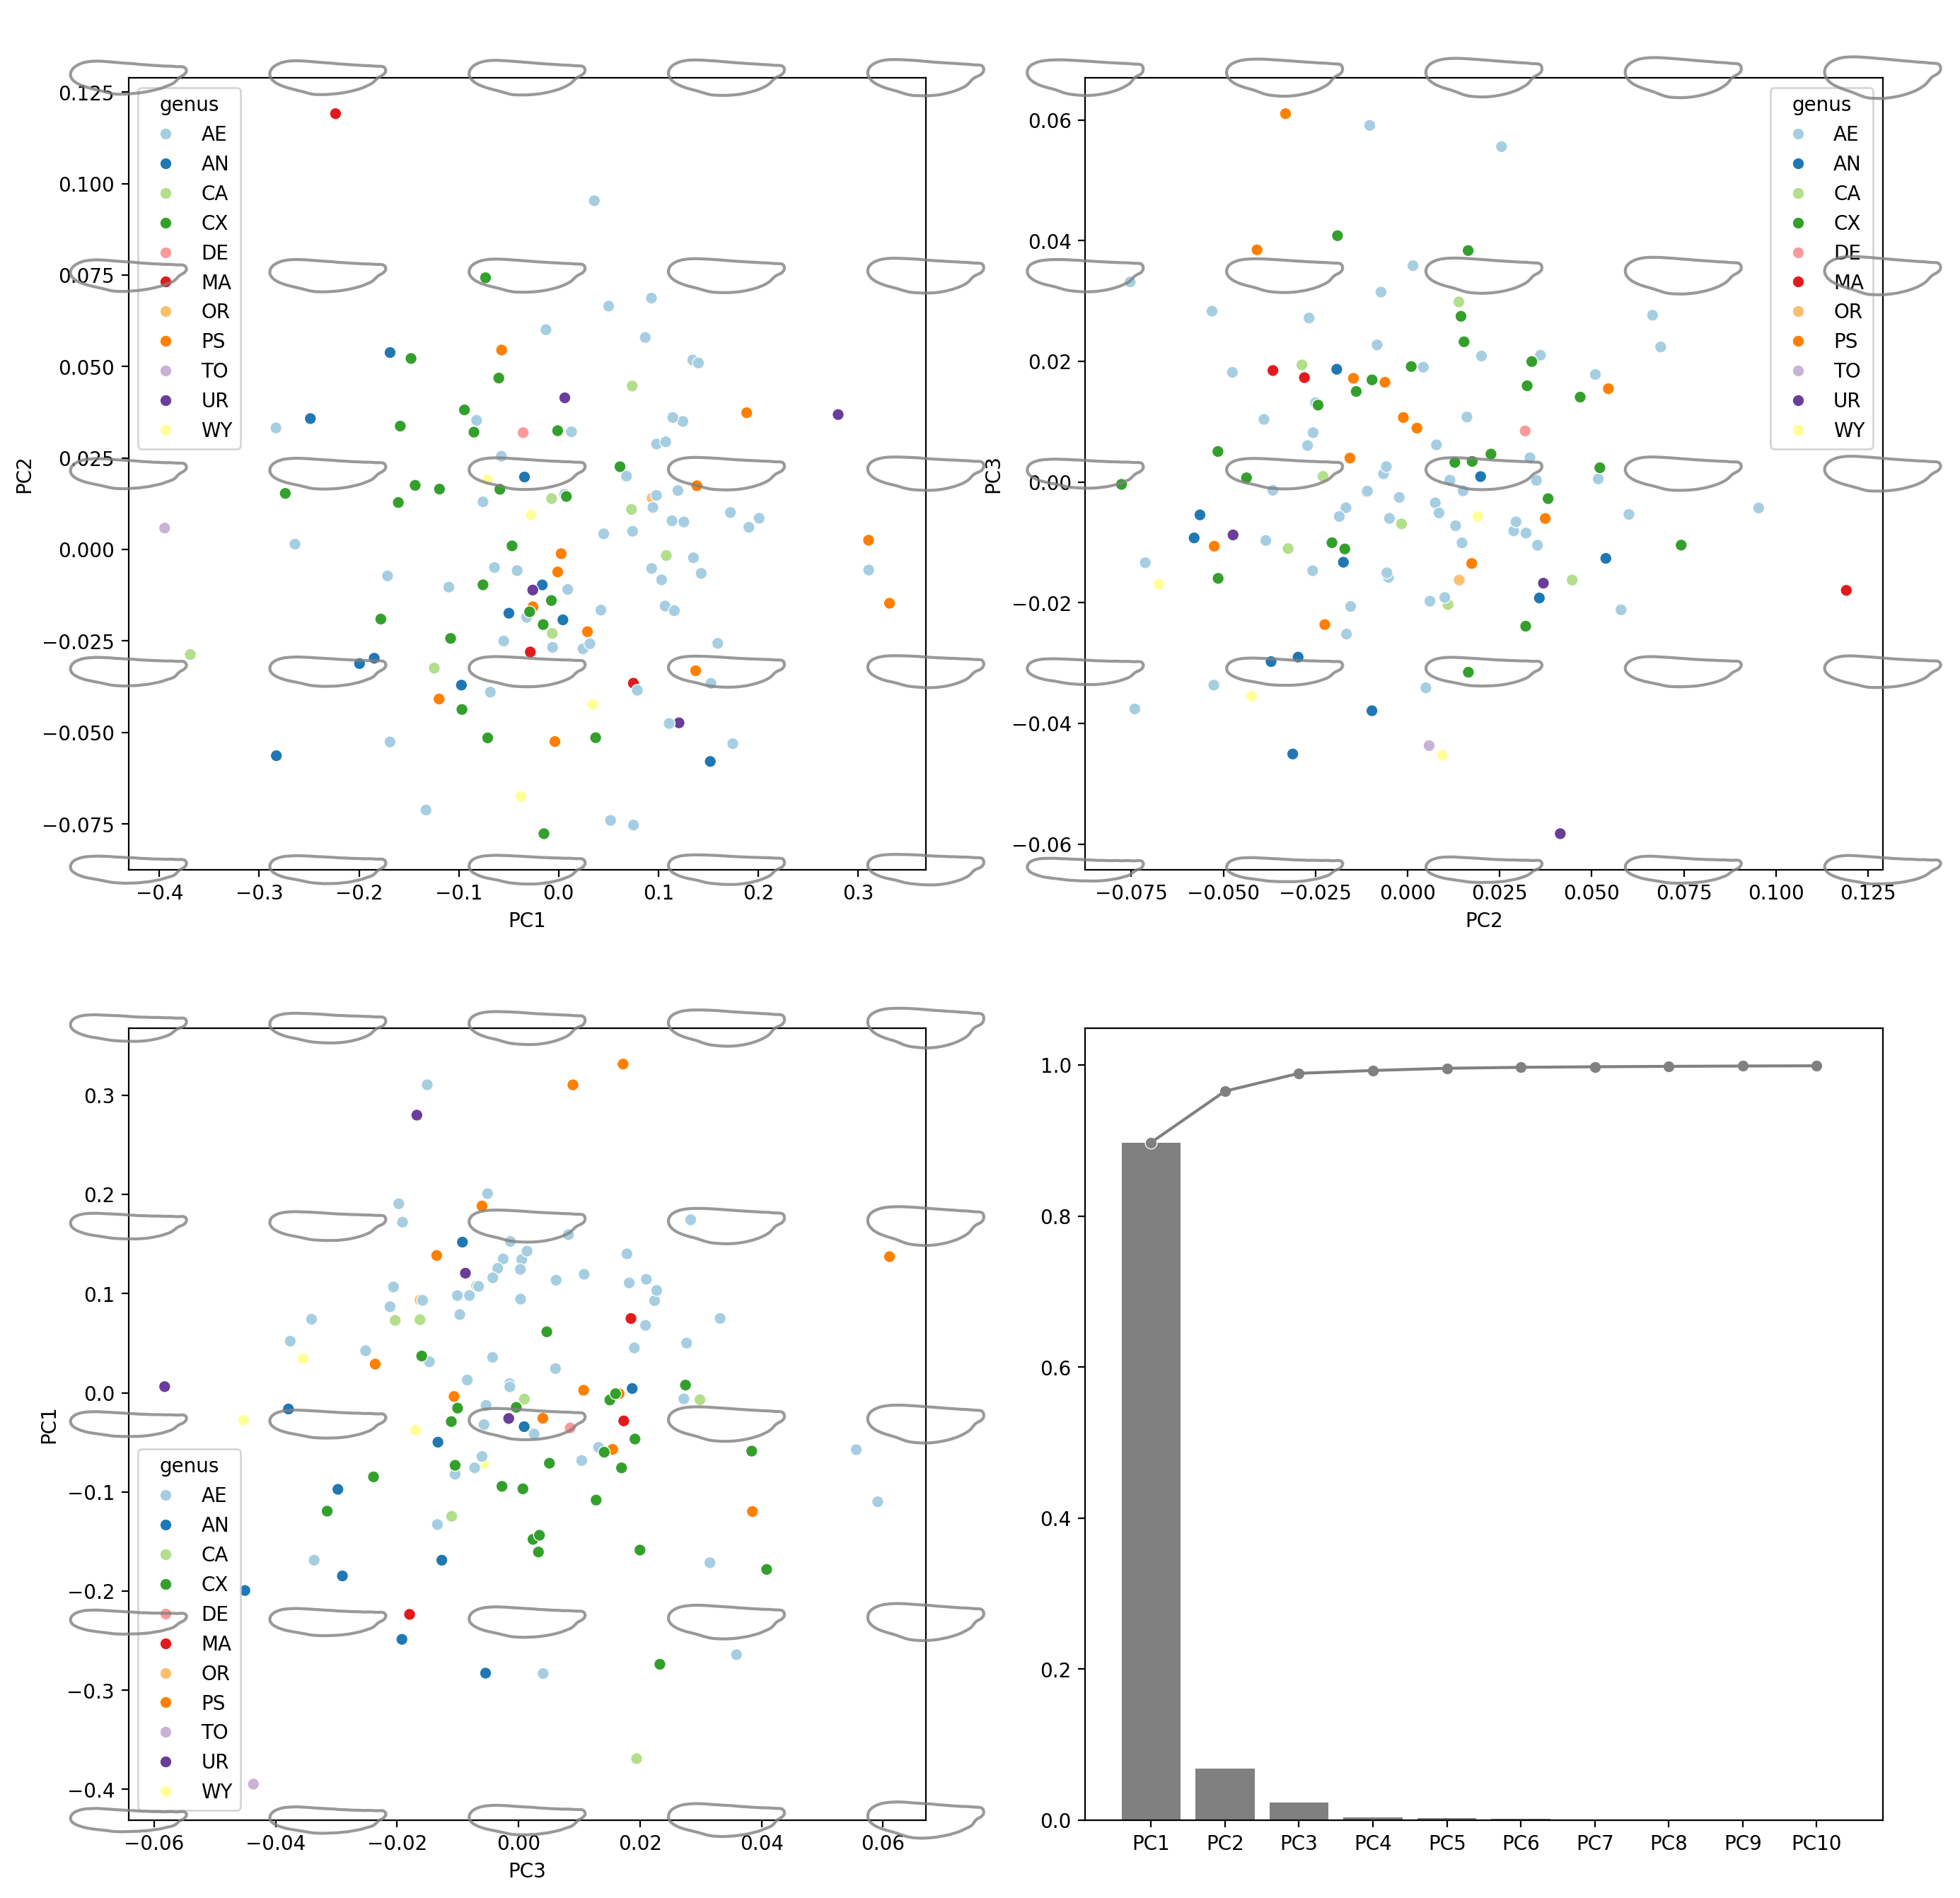

In [25]:
morph_num = 5
morph_scale = 0.8
morph_color = "gray"
morph_alpha = 0.8

fig = plt.figure(figsize=(16, 16), dpi=200)

hue_order = sorted(df_pca["genus"].unique())

#########
# PC1
#########
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="genus",
    hue_order=hue_order,
    palette="Paired",
    ax=ax,
    legend=True,
)

plot_recon_morphs(
    pca,
    efa,
    morph_num=5,
    morph_scale=morph_scale,
    morph_color=morph_color,
    morph_alpha=morph_alpha,
    fig=fig,
    ax=ax,
)

ax.patch.set_alpha(0)
ax.set(xlabel="PC1", ylabel="PC2")

print("PC1-PC2 done")

#########
# PC2
#########
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(
    data=df_pca,
    x="PC2",
    y="PC3",
    hue="genus",
    hue_order=hue_order,
    palette="Paired",
    ax=ax,
    legend=True,
)

plot_recon_morphs(
    pca,
    efa,
    morph_num=5,
    morph_scale=morph_scale,
    morph_color=morph_color,
    morph_alpha=morph_alpha,
    fig=fig,
    ax=ax,
    n_PCs_xy=[2, 3],
)

ax.patch.set_alpha(0)
ax.set(xlabel="PC2", ylabel="PC3")

print("PC2-PC3 done")

#########
# PC3
#########
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(
    data=df_pca,
    x="PC3",
    y="PC1",
    hue="genus",
    hue_order=hue_order,
    palette="Paired",
    ax=ax,
    legend=True,
)

plot_recon_morphs(
    pca,
    efa,
    morph_num=5,
    morph_scale=morph_scale,
    morph_color=morph_color,
    morph_alpha=morph_alpha,
    fig=fig,
    ax=ax,
    n_PCs_xy=[3, 1],
)

ax.patch.set_alpha(0)
ax.set(xlabel="PC3", ylabel="PC1")

print("PC3-PC1 done")

#########
# CCR
#########

ax = fig.add_subplot(2, 2, 4)
plot_explained_variance_ratio(pca, ax=ax, verbose=True)

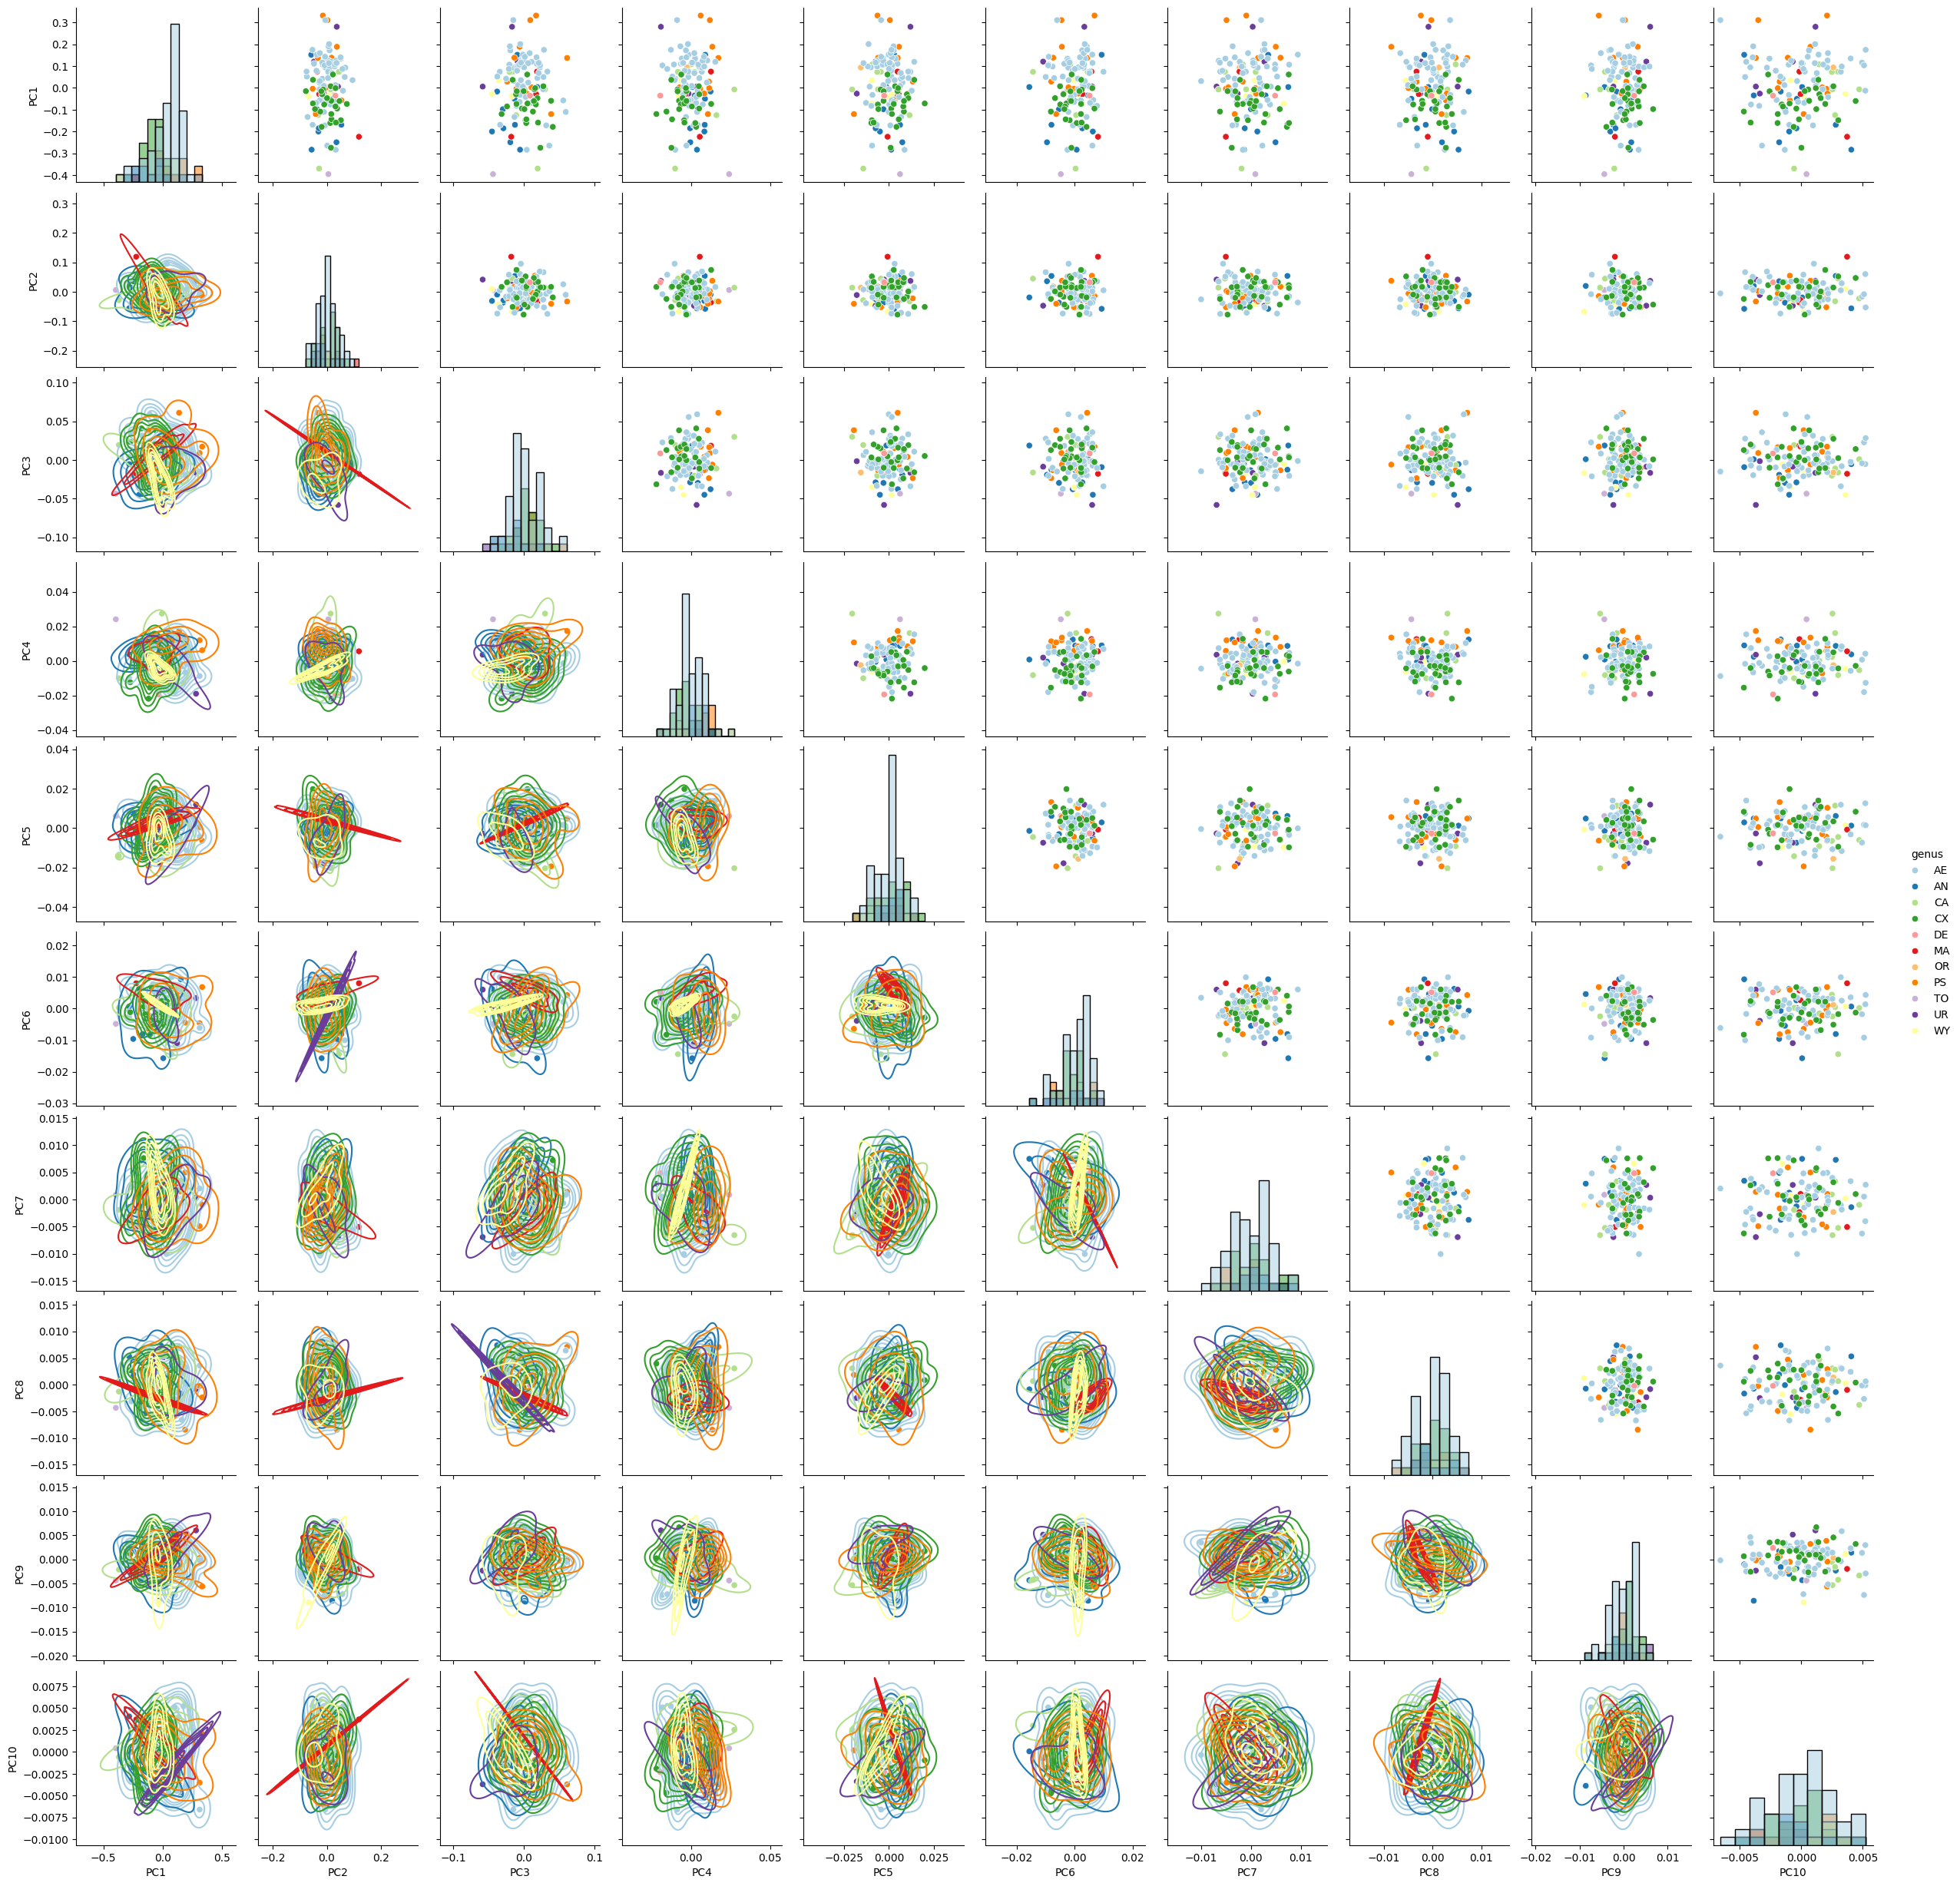

In [23]:
g = sns.pairplot(
    df_pca, hue="genus", hue_order=hue_order, palette="Paired", diag_kind="hist"
)
g.map_lower(sns.kdeplot, warn_singular=False)